## 1、ConversationTokenBufferMemory
ConversationTokenBufferMemory 是 LangChain 中一种基于 Token 数量控制 的对话记忆机制。如果字符数量超出指定数目，它会切掉这个对话的早期部分，以保留与最近的交流相对应的字符数量。

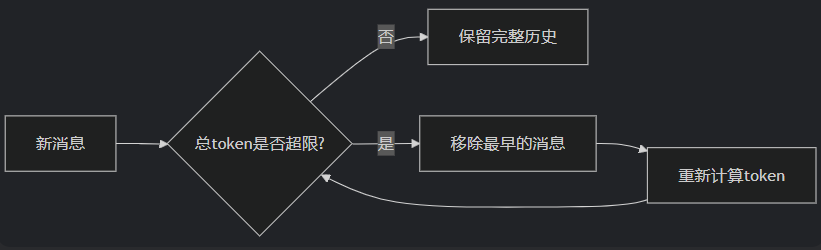

In [2]:
# 1.导入相关包
from langchain.memory import ConversationTokenBufferMemory
from langchain_openai import ChatOpenAI
import os
import dotenv

# 2.加载环境变量
dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

# 3.创建大模型
llm = ChatOpenAI(model="gpt-4o-mini")
# 4.定义ConversationTokenBufferMemory对象
memory = ConversationTokenBufferMemory(
	llm=llm,
	max_token_limit=10  #  设置token上限
)
# 5、添加对话
memory.save_context({"input": "你好吗？"}, {"output": "我很好，谢谢！"})
memory.save_context({"input": "今天天气如何？"}, {"output": "晴天，25度"})
# 6、查看当前记忆
print(memory.load_memory_variables({}))

C:\Users\Chenxr\AppData\Local\Temp\ipykernel_8268\1004261935.py:15: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationTokenBufferMemory(


{'history': ''}


In [4]:
# 1.导入相关包
from langchain.memory import ConversationTokenBufferMemory
from langchain_openai import ChatOpenAI
import os
import dotenv

# 2.加载环境变量
dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

# 3.创建大模型
llm = ChatOpenAI(model="gpt-4o-mini")
# 4.定义ConversationTokenBufferMemory对象
memory = ConversationTokenBufferMemory(
	llm=llm,
	max_token_limit=30  #  设置token上限
)
# 5、添加对话
memory.save_context({"input": "你好吗？"}, {"output": "我很好，谢谢！"})
memory.save_context({"input": "今天天气如何？"}, {"output": "晴天，25度"})
# 6、查看当前记忆
print(memory.load_memory_variables({}))

{'history': 'AI: 我很好，谢谢！\nHuman: 今天天气如何？\nAI: 晴天，25度'}


## 2、ConversationSummaryMemory
ConversationSummaryMemory是 LangChain 中一种 智能压缩对话历史 的记忆机制，它通过大语言模型(LLM)自动生成对话内容的精简摘要，而不是存储原始对话文本。

这种记忆方式特别适合长对话和需要保留核心信息的场景。
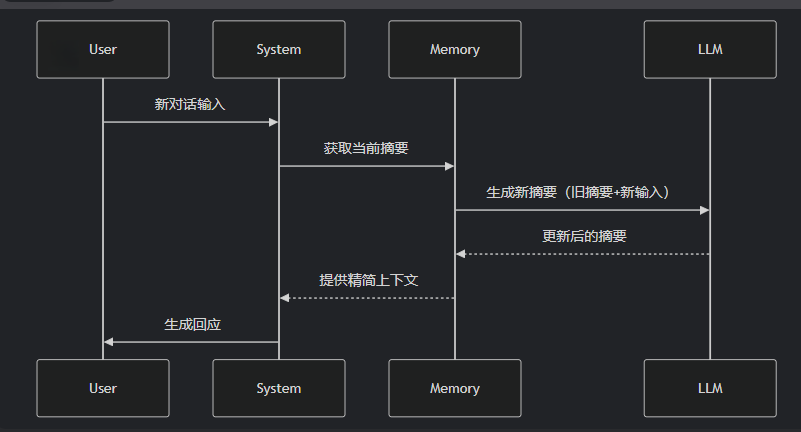

In [7]:
# 场景1：如果实例化ConversationSummaryMemory前，没有历史消息，可以使用构造方法实例化
# 1.导入相关包
from langchain.memory import ConversationSummaryMemory, ChatMessageHistory
from langchain_openai import ChatOpenAI

# 2.创建大模型
llm = ChatOpenAI(model="gpt-4o-mini")
# 3.定义ConversationSummaryMemory对象
memory = ConversationSummaryMemory(llm=llm)
# 4.存储消息
memory.save_context({"input": "你好"}, {"output": "怎么了"})
memory.save_context({"input": "你是谁"}, {"output": "我是AI助手小智"})
memory.save_context({"input": "初次对话，你能介绍一下你自己吗？"}, {"output": "当然可以了。我是一个无所不能的小智。"})
# 5.读取消息（总结后的）
print(memory.load_memory_variables({}))

{'history': 'The human greets the AI in Chinese by saying "你好" (hello), and the AI responds by asking "怎么了" (what\'s wrong). The human then asks, "你是谁" (who are you), to which the AI replies, "我是AI助手小智" (I am AI assistant Xiao Zhi). The human asks for a self-introduction, and the AI responds by stating, "当然可以了。我是一个无所不能的小智" (Of course, I am an all-powerful Xiao Zhi).'}


In [3]:
# 场景2：如果实例化ConversationSummaryMemory前，已经有历史消息，可以调用from_messages()实例化
# 1.导入相关包
from langchain.memory import ConversationSummaryMemory, ChatMessageHistory
from langchain_openai import ChatOpenAI

# 2.定义ChatMessageHistory对象
llm = ChatOpenAI(model="gpt-4o-mini")
# 3.假设原始消息
history = ChatMessageHistory()
history.add_user_message("你好，你是谁？")
history.add_ai_message("我是AI助手小智")
# 4.初始化ConversationSummaryMemory实例
memory = ConversationSummaryMemory.from_messages(
	llm=llm,
	#是生成摘要的原材料 保留完整对话供必要时回溯。当新增对话时，LLM需要结合原始历史生成新摘要
	chat_memory=history,
)
print(memory.load_memory_variables({}), end="\n\n")
memory.save_context(inputs={"human": "我的名字叫小明"}, outputs={"AI": "很高兴认识你"})
print(memory.load_memory_variables({}), end="\n\n")
print(memory.chat_memory.messages)

{'history': 'The human greets and asks who the AI is. The AI responds that it is the AI assistant, Xiaozhi.'}

{'history': 'The human greets the AI and asks who it is. The AI responds that it is the AI assistant, Xiaozhi. The human then introduces himself as Xiaoming, and the AI expresses pleasure at meeting him.'}

[HumanMessage(content='你好，你是谁？', additional_kwargs={}, response_metadata={}), AIMessage(content='我是AI助手小智', additional_kwargs={}, response_metadata={}), HumanMessage(content='我的名字叫小明', additional_kwargs={}, response_metadata={}), AIMessage(content='很高兴认识你', additional_kwargs={}, response_metadata={})]


## 3、ConversationSummaryBufferMemory的使用
ConversationSummaryBufferMemory 是 LangChain 中一种**混合型记忆机制**，它结合了ConversationBufferMemory（完整对话记录）和 ConversationSummaryMemory（摘要记忆）的优点，在保留最近**对话原始记录**的同时，对较早的对话内容进行**智能摘要**。

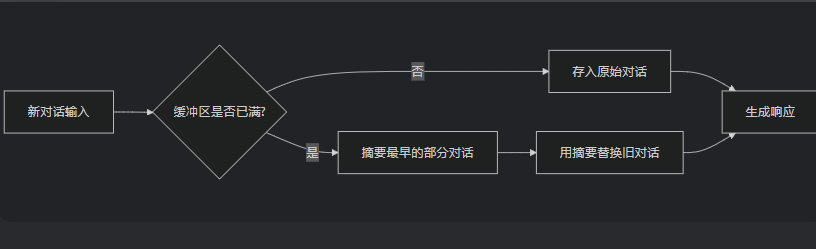

In [6]:
# 举例1
from langchain.memory import ConversationSummaryBufferMemory
from langchain_openai import ChatOpenAI
import os
import dotenv

# 1.加载环境变量
dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")
# 2.创建大模型
llm = ChatOpenAI(model="gpt-4o-mini")
# 3.定义ConversationSummaryBufferMemory对象
memory = ConversationSummaryBufferMemory(
	llm=llm,
	max_token_limit=40,  #  设置token上限
	return_messages=True  #  返回消息而不是字符串
)
# 向memory中添加对话
memory.save_context({"input": "你好"}, {"output": "我很好，谢谢！"})
memory.save_context({"input": "今天天气如何？"}, {"output": "晴天，25度"})
memory.save_context({"input": "你是谁？"}, {"output": "我是AI助手小智"})
memory.save_context({"input": "你能做什么？"}, {"output": "我可以帮助你回答问题，提供信息，进行对话等。"})
# 查看当前记忆
print(memory.load_memory_variables({}))
print()
print(memory.chat_memory.messages)

{'history': [SystemMessage(content="The human greets the AI in Chinese, and the AI responds that it is doing well and thanks the human. The human then asks about the weather, to which the AI replies that it's sunny and 25 degrees. Finally, the human inquires about the AI's identity.", additional_kwargs={}, response_metadata={}), AIMessage(content='我是AI助手小智', additional_kwargs={}, response_metadata={}), HumanMessage(content='你能做什么？', additional_kwargs={}, response_metadata={}), AIMessage(content='我可以帮助你回答问题，提供信息，进行对话等。', additional_kwargs={}, response_metadata={})]}

[AIMessage(content='我是AI助手小智', additional_kwargs={}, response_metadata={}), HumanMessage(content='你能做什么？', additional_kwargs={}, response_metadata={}), AIMessage(content='我可以帮助你回答问题，提供信息，进行对话等。', additional_kwargs={}, response_metadata={})]


In [7]:
# 举例1对比
from langchain.memory import ConversationSummaryBufferMemory
from langchain_openai import ChatOpenAI
import os
import dotenv

# 1.加载环境变量
dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")
# 2.创建大模型
llm = ChatOpenAI(model="gpt-4o-mini")
# 3.定义ConversationSummaryBufferMemory对象
memory = ConversationSummaryBufferMemory(
	llm=llm,
	max_token_limit=100,  #  设置token上限
	return_messages=True  #  返回消息而不是字符串
)
# 向memory中添加对话
memory.save_context({"input": "你好"}, {"output": "我很好，谢谢！"})
memory.save_context({"input": "今天天气如何？"}, {"output": "晴天，25度"})
memory.save_context({"input": "你是谁？"}, {"output": "我是AI助手小智"})
memory.save_context({"input": "你能做什么？"}, {"output": "我可以帮助你回答问题，提供信息，进行对话等。"})
# 查看当前记忆
print(memory.load_memory_variables({}))
print()
print(memory.chat_memory.messages)

{'history': [HumanMessage(content='你好', additional_kwargs={}, response_metadata={}), AIMessage(content='我很好，谢谢！', additional_kwargs={}, response_metadata={}), HumanMessage(content='今天天气如何？', additional_kwargs={}, response_metadata={}), AIMessage(content='晴天，25度', additional_kwargs={}, response_metadata={}), HumanMessage(content='你是谁？', additional_kwargs={}, response_metadata={}), AIMessage(content='我是AI助手小智', additional_kwargs={}, response_metadata={}), HumanMessage(content='你能做什么？', additional_kwargs={}, response_metadata={}), AIMessage(content='我可以帮助你回答问题，提供信息，进行对话等。', additional_kwargs={}, response_metadata={})]}

[HumanMessage(content='你好', additional_kwargs={}, response_metadata={}), AIMessage(content='我很好，谢谢！', additional_kwargs={}, response_metadata={}), HumanMessage(content='今天天气如何？', additional_kwargs={}, response_metadata={}), AIMessage(content='晴天，25度', additional_kwargs={}, response_metadata={}), HumanMessage(content='你是谁？', additional_kwargs={}, response_metadata={}), AIMe

In [10]:
# 举例2：模拟客服交互
from langchain.memory import ConversationSummaryBufferMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.chains.llm import LLMChain

# 1、初始化大语言模型
llm = ChatOpenAI(
	model="gpt-4o-mini",
	temperature=0.5,
	max_tokens=500
)
# 2、定义提示模板
prompt = ChatPromptTemplate.from_messages([
	("system", "你是电商客服助手，用中文友好回复用户问题。保持专业但亲切的语气。"),
	MessagesPlaceholder(variable_name="chat_history"),
	("human", "{input}")
])
# 3、创建带摘要缓冲的记忆系统
memory = ConversationSummaryBufferMemory(
	llm=llm,
	max_token_limit=400,
	memory_key="chat_history",
	return_messages=True
)
# 4、创建对话链
chain = LLMChain(
	llm=llm,
	prompt=prompt,
	memory=memory,
)
# 5、模拟多轮对话
dialogue = [
	("你好，我想查询订单12345的状态", None),
	("这个订单是上周五下的", None),
	("我现在急着用，能加急处理吗", None),
	("等等，我可能记错订单号了，应该是12346", None),
	("对了，你们退货政策是怎样的", None)
]
# 6、执行对话
for user_input, _ in dialogue:
	response = chain.invoke({"input": user_input})
	print(f"用户: {user_input}")
	print(f"客服: {response['text']}\n")
# 7、查看当前记忆状态
print("\n=== 当前记忆内容 ===")
print(memory.load_memory_variables({}))

用户: 你好，我想查询订单12345的状态
客服: 您好！感谢您联系我查询订单状态。请稍等片刻，我将为您查找订单12345的最新状态。 

（假如有具体的订单状态信息，可以在这里提供给用户；如果没有，则可以说明需要进一步的处理时间或建议用户查看自己的账户。）

用户: 这个订单是上周五下的
客服: 感谢您提供的订单信息！我会尽快为您查询上周五下的订单12345的状态。请您稍等片刻。

（如果查询结果已知，可以在此处提供；如果需要时间，可以告知用户预计的查询时间。）

用户: 我现在急着用，能加急处理吗
客服: 非常理解您的紧急需求！我会尽力帮助您加急处理订单。请您提供一下您的联系方式，我们会尽快与相关部门沟通，尽量加快发货速度。

感谢您的耐心等待！

用户: 等等，我可能记错订单号了，应该是12346
客服: 没问题，感谢您提供正确的订单号！我将立即为您查询订单12346的状态。请稍等片刻。

（如果查询结果已知，可以在此处提供；如果需要时间，可以告知用户预计的查询时间。）

用户: 对了，你们退货政策是怎样的
客服: 我们的退货政策如下：

1. **退货时间**：您可以在收到商品后的7天内申请退货。
2. **退货条件**：商品需保持原包装、未使用且附带所有标签和配件。
3. **申请流程**：请登录您的账户，找到订单，选择需要退货的商品，按照系统提示申请退货。
4. **运费**：如果是因商品质量问题导致的退货，我们将承担运费；其他情况，运费由您承担。

如果您有其他具体问题或需要进一步的帮助，请随时告诉我！


=== 当前记忆内容 ===
{'chat_history': [SystemMessage(content='The human asks about the status of order 12345. The AI responds by thanking the human for their inquiry and indicates that it will check the latest status of the order.', additional_kwargs={}, response_metadata={}), HumanMessage(content='这个订单是上周五下的', additional_kwargs={},

## 4、ConversationEntityMemory(了解)
ConversationEntityMemory 是一种基于实体的对话记忆机制，它能够智能地识别、存储和利用对话中出现的实体信息（如人名、地点、产品等）及其属性/关系，并结构化存储，使 AI 具备更强的上下理
解和记忆能力。

** 好处：解决信息过载问题 **
- 长对话中大量冗余信息会干扰关键事实记忆
- 通过对实体摘要，可以压缩非重要细节（如删除寒暄等，保留价格/时间等硬性事实）

**应用场景**：在医疗等高风险领域，必须用实体记忆确保关键信息（如过敏史）被100%准确识别和拦截。

```python
{"input": "我头痛，血压140/90，在吃阿司匹林。"},
{"output": "建议监测血压，阿司匹林可继续服用。"}
{"input": "我对青霉素过敏。"},
{"output": "已记录您的青霉素过敏史。"}
{"input": "阿司匹林吃了三天，头痛没缓解。"},
{"output": "建议停用阿司匹林，换布洛芬试试。"}
```
使用ConversationSummaryMemory

```shell
"患者主诉头痛和⾼⾎压（140/90），正在服⽤阿司匹林。患者对⻘霉素过敏。三天后头痛未缓解，建议更换⽌痛药。"
```

使用ConversationEntityMemory

```shell
{
"症状": "头痛",
"⾎压": "140/90",
"当前⽤药": "阿司匹林（⽆效）",
"过敏药物": "⻘霉素"
}
```

In [11]:
# 举例1
from langchain.chains.conversation.base import LLMChain
from langchain.memory import ConversationEntityMemory
from langchain.memory.prompt import ENTITY_MEMORY_CONVERSATION_TEMPLATE
from langchain_openai import ChatOpenAI

# 初始化大语言模型
llm = ChatOpenAI(model_name='gpt-4o-mini', temperature=0)
# 使用LangChain为实体记忆设计的预定义模板
prompt = ENTITY_MEMORY_CONVERSATION_TEMPLATE
# 初始化实体记忆
memory = ConversationEntityMemory(llm=llm)
# 提供对话链
chain = LLMChain(
	llm=llm,
	prompt=ENTITY_MEMORY_CONVERSATION_TEMPLATE,
	memory=ConversationEntityMemory(llm=llm),
	#verbose=True, # 设置为True可以看到链的详细推理过程
)
# 进行几轮对话，记忆组件会在后台自动提取和存储实体信息
chain.invoke(input="你好，我叫蜘蛛侠。我的好朋友包括钢铁侠、美国队长和绿巨人。")
chain.invoke(input="我住在纽约。")
chain.invoke(input="我使用的装备是由斯塔克工业提供的。")
# 查询记忆体中存储的实体信息
print("\n当前存储的实体信息:")
print(chain.memory.entity_store.store)

print("\n\n")
# 基于记忆进行提问
answer = chain.invoke(input="你能告诉我蜘蛛侠住在哪里以及他的好朋友有哪些吗？")
print("\nAI的回答:")
print(answer)

C:\Users\Chenxr\AppData\Local\Temp\ipykernel_8268\1896383796.py:12: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationEntityMemory(llm=llm)
E:\Projects\Python\langchain-learn\.venv\lib\site-packages\pydantic\main.py:253: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)



当前存储的实体信息:
{'蜘蛛侠': '蜘蛛侠的好朋友包括钢铁侠、美国队长和绿巨人。', '钢铁侠': '钢铁侠是蜘蛛侠的好朋友。', '美国队长': '美国队长是蜘蛛侠的好朋友。', '绿巨人': '绿巨人是蜘蛛侠的好朋友。', '纽约': '蜘蛛侠住在纽约。', '斯塔克工业': '斯塔克工业提供蜘蛛侠使用的装备。'}




AI的回答:
{'input': '你能告诉我蜘蛛侠住在哪里以及他的好朋友有哪些吗？', 'history': 'Human: 你好，我叫蜘蛛侠。我的好朋友包括钢铁侠、美国队长和绿巨人。\nAI: 你好，蜘蛛侠！很高兴认识你。听说你和钢铁侠、美国队长以及绿巨人是好朋友，你们一起经历了很多冒险吧！最近有什么有趣的事情发生吗？\nHuman: 我住在纽约。\nAI: 纽约是个很棒的地方！作为蜘蛛侠，你一定对这座城市非常熟悉。你最喜欢在纽约的哪个地方活动？或者有没有什么特别的地方是你和你的朋友们常去的？\nHuman: 我使用的装备是由斯塔克工业提供的。\nAI: 那真是太酷了！斯塔克工业的装备技术非常先进，能够帮助你在战斗中更有效地保护城市。你最喜欢使用哪些斯塔克工业的装备？有没有什么特别的功能让你觉得特别有用？', 'entities': {'蜘蛛侠': '蜘蛛侠的好朋友包括钢铁侠、美国队长和绿巨人。', '纽约': '蜘蛛侠住在纽约。', '钢铁侠': '钢铁侠是蜘蛛侠的好朋友。', '美国队长': '美国队长是蜘蛛侠的好朋友。', '绿巨人': '绿巨人是蜘蛛侠的好朋友。', '斯塔克工业': '斯塔克工业提供蜘蛛侠使用的装备。'}, 'text': '蜘蛛侠住在纽约。他的好朋友包括钢铁侠、美国队长和绿巨人。你们一起经历了很多冒险，真是令人羡慕！如果你有其他问题或者想聊聊更多关于蜘蛛侠的事情，随时告诉我！'}


## 5、ConversationKGMemory(了解)
ConversationKGMemory是一种基于**知识图谱**（Knowledge Graph）的对话记忆模块，它比ConversationEntityMemory 更进一步，不仅能识别和存储实体，还能捕捉实体之间的复杂关系，形成结构化的知识网络。

特点：
- 知识图谱结构 将对话内容转化为 (头实体, 关系, 尾实体) 的三元组形式
- 动态关系推理

In [14]:
# 举例1
#1.导入相关包
from langchain.memory import ConversationKGMemory
from langchain.chat_models import ChatOpenAI

# 2.定义LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
# 3.定义ConversationKGMemory对象
memory = ConversationKGMemory(llm=llm)
# 4.保存会话
memory.save_context({"input": "向山姆问好"}, {"output": "山姆是谁"})
memory.save_context({"input": "山姆是我的朋友"}, {"output": "好的"})
# 5.查询会话
memory.load_memory_variables({"input": "山姆是谁"})

{'history': 'On 山姆: 山姆 是 我的朋友.'}

In [15]:
memory.get_knowledge_triplets("他最喜欢的颜色是粉色")

[KnowledgeTriple(subject='山姆', predicate='是', object_='我的朋友'),
 KnowledgeTriple(subject='山姆', predicate='最喜欢的颜色是', object_='粉色')]

## 6、 VectorStoreRetrieverMemory(了解)
VectorStoreRetrieverMemory是一种基于 向量检索 的先进记忆机制，它将对话历史存储在向量数据库中，通过 语义相似度检索 相关信息，而非传统的线性记忆方式。每次调用时，就会查找与该记忆关联最高的k个文档。

适用场景：这种记忆特别适合需要长期记忆和语义理解的复杂对话系统。

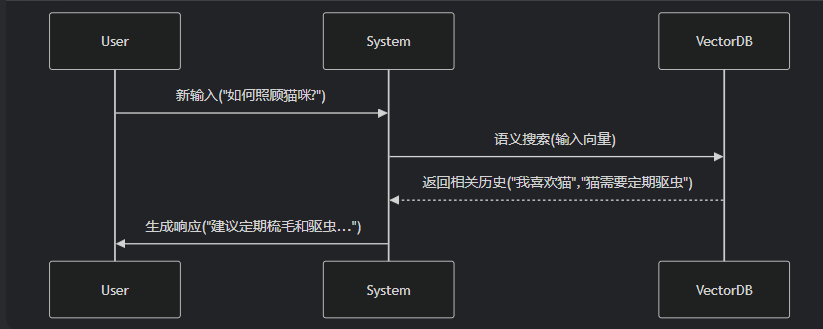

In [16]:
import os
import dotenv
from langchain_openai import OpenAIEmbeddings
dotenv.load_dotenv()
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY1")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")
embeddings_model = OpenAIEmbeddings(
model="text-embedding-ada-002"
)

In [17]:
# 1.导入相关包
from langchain_openai import OpenAIEmbeddings
from langchain.memory import VectorStoreRetrieverMemory
from langchain_community.vectorstores import FAISS
from langchain.memory import ConversationBufferMemory
# 2.定义ConversationBufferMemory对象
memory = ConversationBufferMemory()
memory.save_context({"input": "我最喜欢的食物是披萨"}, {"output": "很高兴知道"})
memory.save_context({"Human": "我喜欢的运动是跑步"}, {"AI": "好的,我知道了"})
memory.save_context({"Human": "我最喜欢的运动是足球"}, {"AI": "好的,我知道了"})
# 3.定义向量嵌入模型
embeddings_model = OpenAIEmbeddings(
model="text-embedding-ada-002"
)
# 4.初始化向量数据库
vectorstore = FAISS.from_texts(memory.buffer.split("\n"), embeddings_model) # 空初始化
# 5.定义检索对象
retriever = vectorstore.as_retriever(search_kwargs=dict(k=1))
# 6.初始化VectorStoreRetrieverMemory
memory = VectorStoreRetrieverMemory(retriever=retriever)
print(memory.load_memory_variables({"prompt": "我最喜欢的食物是"}))

C:\Users\Chenxr\AppData\Local\Temp\ipykernel_8268\3725671510.py:7: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()
C:\Users\Chenxr\AppData\Local\Temp\ipykernel_8268\3725671510.py:20: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = VectorStoreRetrieverMemory(retriever=retriever)


{'history': 'Human: 我最喜欢的食物是披萨'}
